<a href="https://colab.research.google.com/github/rafiag/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
# Load dataset
df = pd.read_csv('https://github.com/rafiag/Heart-Failure-Prediction/raw/main/heart_failure_clinical_records_dataset.csv')

# print(df_bank.info())
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

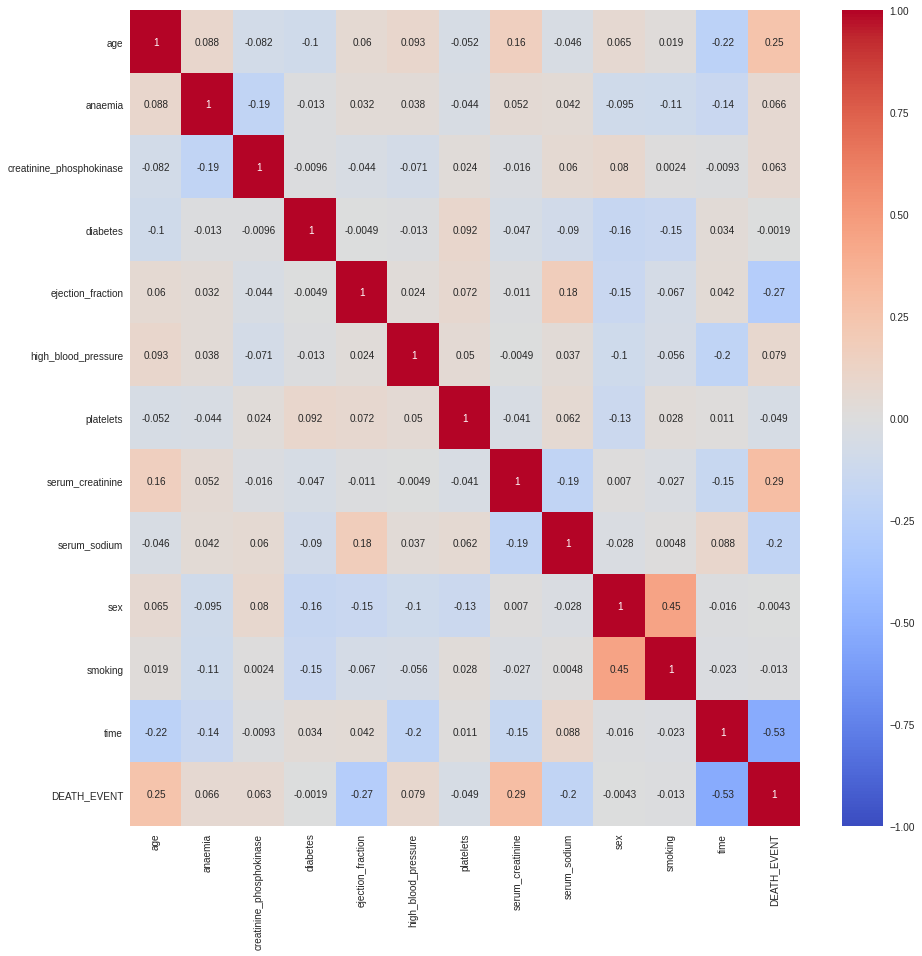

In [5]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

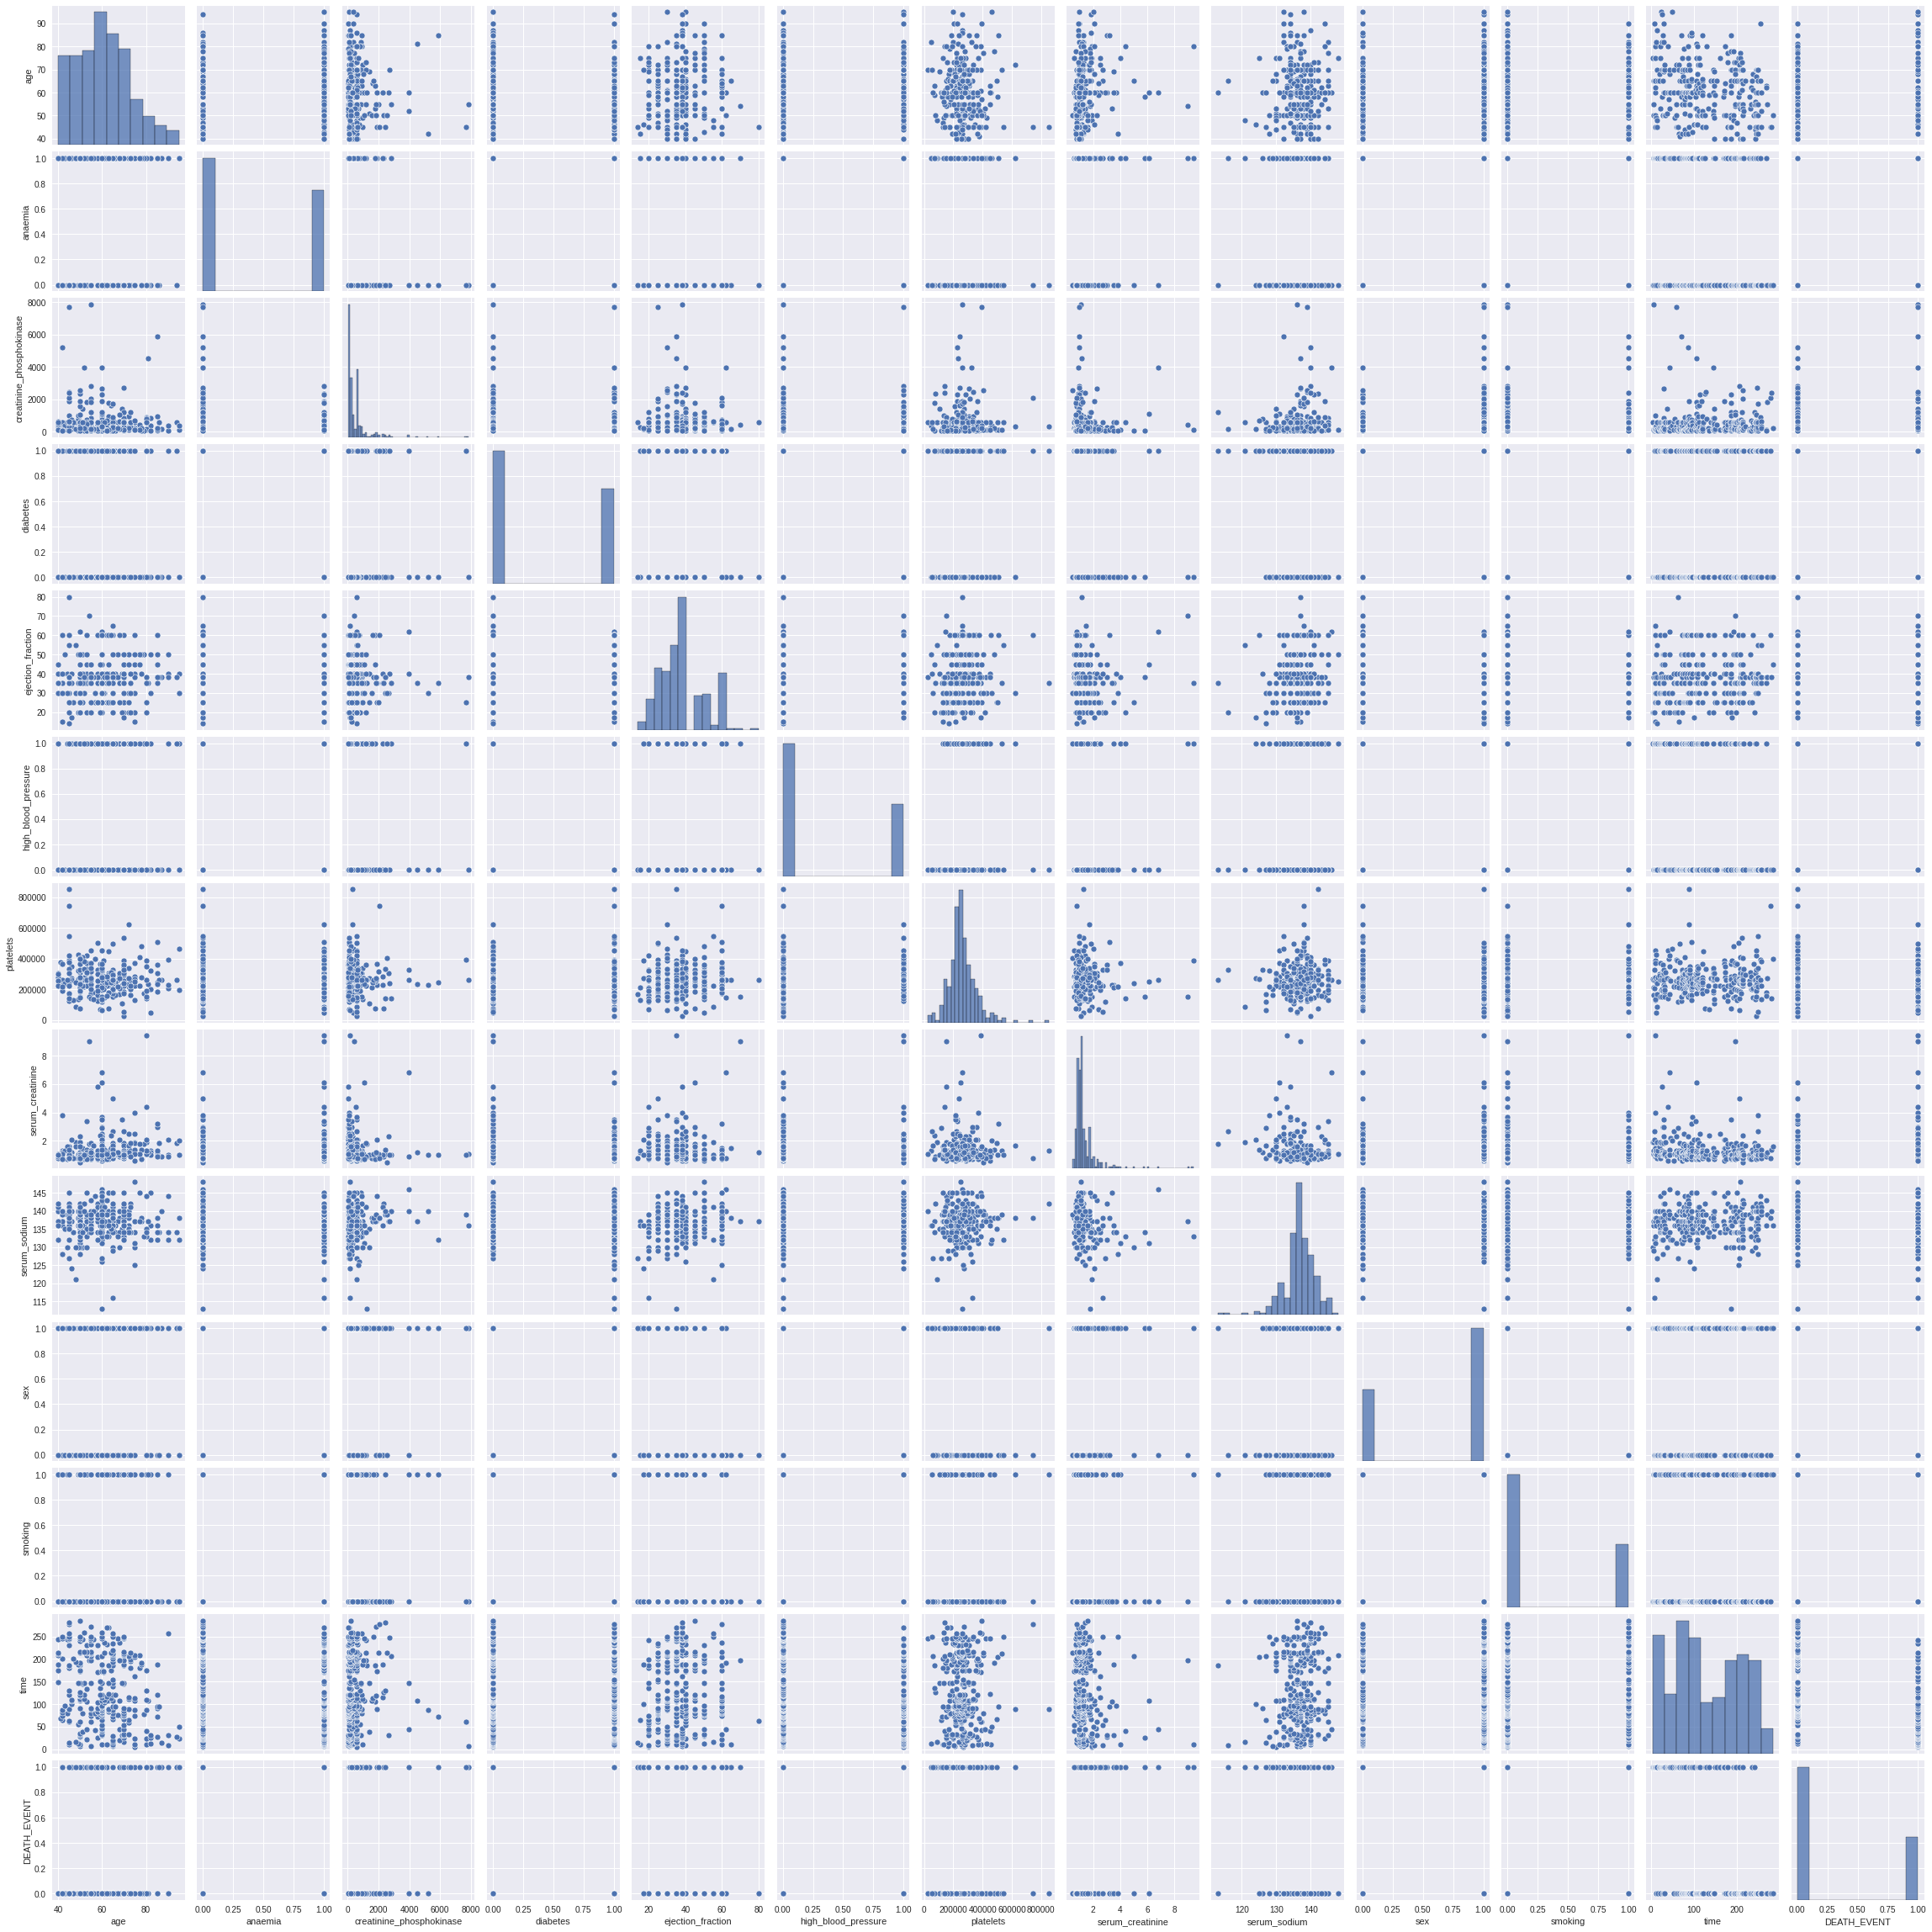

In [6]:
sns.pairplot(df)

# Best feature

## Training Model

In [7]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [33]:
# Select feature
x = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = df['DEATH_EVENT']

# Scale data
from sklearn.preprocessing import StandardScaler
# Copying original dataframe
scaler = StandardScaler()
num_cols = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
x_scaled = scaler.fit_transform(x)

# Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled ,y, random_state=1, test_size=0.2)

# Train model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_bf = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1,
                    cv=skf.split(x_train,y_train), verbose=0)

grid_bf.fit(x_train ,y_train, early_stopping_rounds=30, eval_set=[(x_test, y_test)])

[0]	validation_0-error:0.233333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.233333
[2]	validation_0-error:0.25
[3]	validation_0-error:0.216667
[4]	validation_0-error:0.25
[5]	validation_0-error:0.216667
[6]	validation_0-error:0.25
[7]	validation_0-error:0.233333
[8]	validation_0-error:0.233333
[9]	validation_0-error:0.266667
[10]	validation_0-error:0.2
[11]	validation_0-error:0.216667
[12]	validation_0-error:0.2
[13]	validation_0-error:0.183333
[14]	validation_0-error:0.183333
[15]	validation_0-error:0.183333
[16]	validation_0-error:0.183333
[17]	validation_0-error:0.183333
[18]	validation_0-error:0.183333
[19]	validation_0-error:0.183333
[20]	validation_0-error:0.183333
[21]	validation_0-error:0.183333
[22]	validation_0-error:0.183333
[23]	validation_0-error:0.166667
[24]	validation_0-error:0.183333
[25]	validation_0-error:0.183333
[26]	validation_0-error:0.183333
[27]	validation_0-error:0.183333
[28]	validation_0-error:0.183333
[29]	vali

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f0017a6e2b0>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2,

## Evaluating Model

Accuracy: 0.8666666666666667
Precision: 0.7142857142857143
Recall: 0.7142857142857143
F1 score: 0.7142857142857143
Cohen Kappa Score: 0.6273291925465838
AUC: 0.8944099378881988


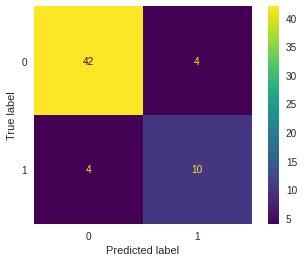

In [35]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

best_grid_bf = grid_bf.best_estimator_
best_grid_bf_pred = best_grid_bf.predict(x_test)

# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_bf_acc = metrics.accuracy_score(y_test, best_grid_bf_pred)
best_grid_bf_prec = metrics.precision_score(y_test, best_grid_bf_pred)
best_grid_bf_rec = metrics.recall_score(y_test, best_grid_bf_pred)
best_grid_bf_f1 = metrics.f1_score(y_test, best_grid_bf_pred)
best_grid_bf_kappa = metrics.cohen_kappa_score(y_test, best_grid_bf_pred)

# Calculate area under curve (AUC)
best_grid_bf_pred_proba = best_grid_bf.predict_proba(x_test)[::,1]
best_grid_bf_fpr, best_grid_bf_tpr, _ = metrics.roc_curve(y_test,  best_grid_bf_pred_proba)
best_grid_bf_auc = metrics.roc_auc_score(y_test, best_grid_bf_pred_proba)

print('Accuracy:', best_grid_bf_acc)
print('Precision:', best_grid_bf_prec)
print('Recall:', best_grid_bf_rec)
print('F1 score:', best_grid_bf_f1)
print('Cohen Kappa Score:', best_grid_bf_kappa)
print('AUC:', best_grid_bf_auc)

# Display confussion matrix
# cm = metrics.confusion_matrix(y_test, best_grid_bf_pred)
# print('Confusion Matrix:\n', cm)
plot_confusion_matrix(best_grid_bf, x_test, y_test)
plt.grid(False)
plt.show()

# Easy feature

## Training Model

In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [36]:
# Select feature
x = df[['age', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

# Scale data
from sklearn.preprocessing import StandardScaler
# Copying original dataframe
scaler = StandardScaler()
num_cols = ['age']
x_scaled = scaler.fit_transform(x)

# Split dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled ,y, random_state=1, test_size=0.2)

# Train model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_ef = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, 
                    cv=skf.split(x_train,y_train), verbose=0 )

grid_ef.fit(x_train ,y_train, early_stopping_rounds=30, eval_set=[(x_test, y_test)])

[0]	validation_0-error:0.183333
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.183333
[2]	validation_0-error:0.183333
[3]	validation_0-error:0.183333
[4]	validation_0-error:0.183333
[5]	validation_0-error:0.183333
[6]	validation_0-error:0.183333
[7]	validation_0-error:0.183333
[8]	validation_0-error:0.183333
[9]	validation_0-error:0.183333
[10]	validation_0-error:0.183333
[11]	validation_0-error:0.183333
[12]	validation_0-error:0.183333
[13]	validation_0-error:0.183333
[14]	validation_0-error:0.183333
[15]	validation_0-error:0.183333
[16]	validation_0-error:0.183333
[17]	validation_0-error:0.183333
[18]	validation_0-error:0.183333
[19]	validation_0-error:0.183333
[20]	validation_0-error:0.183333
[21]	validation_0-error:0.183333
[22]	validation_0-error:0.183333
[23]	validation_0-error:0.183333
[24]	validation_0-error:0.183333
[25]	validation_0-error:0.183333
[26]	validation_0-error:0.183333
[27]	validation_0-error:0.183333
[28]	validation_0-er

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f0017bff3b8>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2,

## Evaluating Model

Accuracy: 0.8166666666666667
Precision: 1.0
Recall: 0.21428571428571427
F1 score: 0.35294117647058826
Cohen Kappa Score: 0.29487179487179493
AUC: 0.6071428571428571


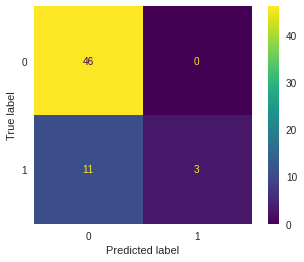

In [37]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

best_grid_ef = grid_ef.best_estimator_
best_grid_ef_pred = best_grid_ef.predict(x_test)

# Calculate accuracy, precision, recall, f1-score, and kappa score
best_grid_ef_acc = metrics.accuracy_score(y_test, best_grid_ef_pred)
best_grid_ef_prec = metrics.precision_score(y_test, best_grid_ef_pred)
best_grid_ef_rec = metrics.recall_score(y_test, best_grid_ef_pred)
best_grid_ef_f1 = metrics.f1_score(y_test, best_grid_ef_pred)
best_grid_ef_kappa = metrics.cohen_kappa_score(y_test, best_grid_ef_pred)

# Calculate area under curve (AUC)
best_grid_ef_pred_proba = best_grid_ef.predict_proba(x_test)[::,1]
best_grid_ef_fpr, best_grid_ef_tpr, _ = metrics.roc_curve(y_test,  best_grid_ef_pred_proba)
best_grid_ef_auc = metrics.roc_auc_score(y_test, best_grid_ef_pred_proba)

print('Accuracy:', best_grid_ef_acc)
print('Precision:', best_grid_ef_prec)
print('Recall:', best_grid_ef_rec)
print('F1 score:', best_grid_ef_f1)
print('Cohen Kappa Score:', best_grid_ef_kappa)
print('AUC:', best_grid_ef_auc)

# Display confussion matrix
# cm = metrics.confusion_matrix(y_test, best_grid_ef_pred)
# print('Confusion Matrix:\n', cm)
plot_confusion_matrix(best_grid_ef, x_test, y_test)
plt.grid(False)
plt.show()